In this Notebook:
1. Preparation

# 1. Preparation

In [11]:
# Importing Libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [12]:
#display charts in the notebook
%matplotlib inline

In [13]:
#define path
path = r"/Users/katerinapilota/Desktop/Project_6"

In [15]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'patent_clean_final.csv'))

In [16]:
#checking data
df.shape

(38438, 46)

In [17]:
df.head()

,Unnamed: 0,Office,Office (Code),Applicant Origin - Country,"1 - Electrical machinery, apparatus, energy",2 - Audio-visual technology,3 - Telecommunications,4 - Digital communication,5 - Basic communication processes,6 - Computer technology,...,"33 - Furniture, games",34 - Other consumer goods,35 - Civil engineering,Year,Applicant Origin - Region,Total patent numbers,GDP PPP (per capita),R&D (% GDP),Fertility Rate (15-19 yo),Patent count category
0,0,European Patent Office,EP,Liechtenstein,13,0,0,0,0,0,...,0,0,0,2019,Western Europe,13,NaN,NaN,NaN,NaN
1,1,Germany,DE,Liechtenstein,1,0,0,0,0,0,...,0,0,0,2019,Western Europe,1,NaN,NaN,NaN,Low
2,2,Italy,IT,Liechtenstein,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,0,NaN,NaN,NaN,Low
3,3,Japan,JP,Liechtenstein,1,0,0,0,0,0,...,0,0,0,2019,Western Europe,1,NaN,NaN,NaN,Low
4,4,Poland,PL,Liechtenstein,0,0,0,0,0,0,...,0,0,0,2019,Western Europe,0,NaN,NaN,NaN,Low


# 2. Wrangling and subsetting the data for time series analysis

In [18]:
#create subset for time series analysis
time = df[['Total patent numbers', 'Year']]

In [19]:
time.head()

,Total patent numbers,Year
0,13,2019
1,1,2019
2,0,2019
3,1,2019
4,0,2019


In [20]:
time['Year'] = pd.to_datetime(time['Year'], format = "%Y").dt.strftime('%Y')

In [21]:
# Set the "year" column as the index

time.set_index('Year', inplace = True) # Set the datetime as the index of the dataframe.
time.head()

,Total patent numbers
Year,
2019,13
2019,1
2019,0
2019,1
2019,0


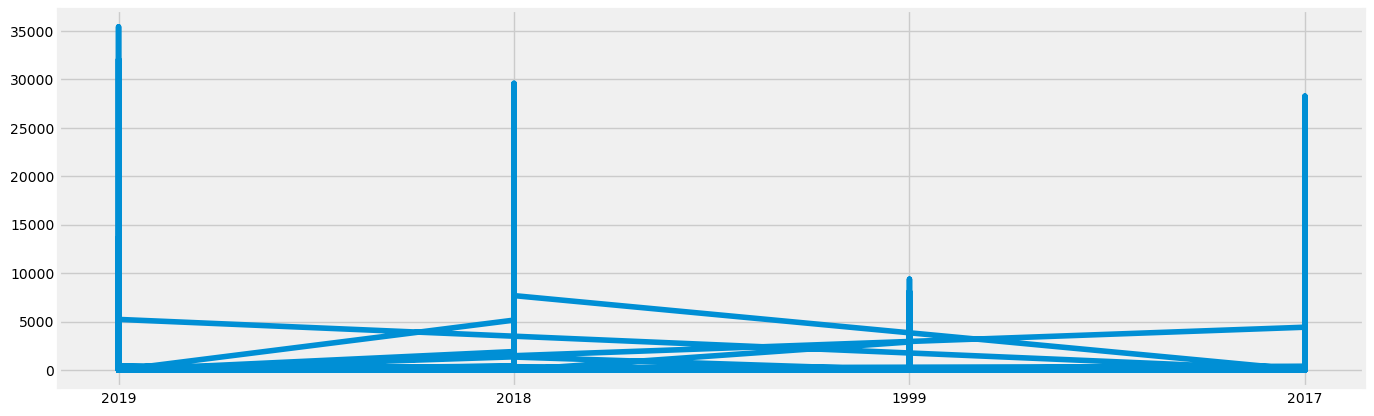

In [22]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(time)

In [23]:
#checking for missing values
time.isnull().sum()

Total patent numbers    0
dtype: int64

# 3. Time Series Analysis: Decomposition

In [29]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(time, period=1, model='additive')

In [30]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

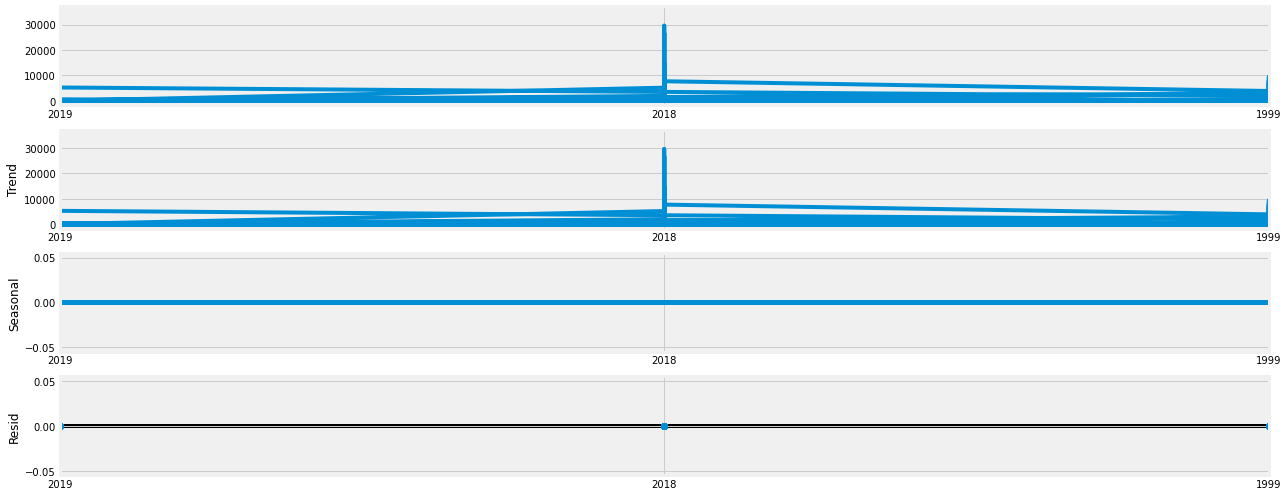

In [31]:
# Plot the separate components

decomposition.plot()
plt.show()

Unfortunately, trend and seasonality and noise are not readily visible in this dataset because there are not enough unique years captured by this dataset.

# 4. Testing for Stationarity

In [33]:
#using adfuller() function

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test
dickey_fuller(time['Total patent numbers'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.221163e+01
p-value                        1.160213e-22
Number of Lags Used            5.400000e+01
Number of Observations Used    3.838300e+04
Critical Value (1%)           -3.430520e+00
Critical Value (5%)           -2.861615e+00
Critical Value (10%)          -2.566810e+00
dtype: float64


Results of test: 
p-value result indicates the test is not significant
As the test statistic is larger than the critical value/s, it means we can’t reject null hypothesis

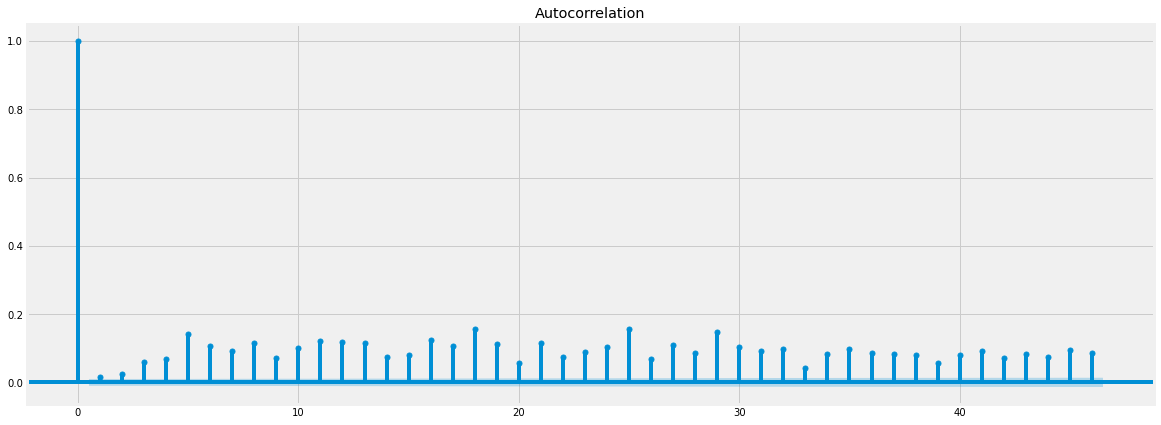

In [34]:
# Check autocorrelations with plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #import the autocorrelation and partial correlation plots

plot_acf(time)
plt.show()

This plot supports the result of the Dickey-Fuller Test earlier: As the lags are dignificantly correlated with each other, and as the plot shows many lags beyond the blue interval we can deduce that the data is non-stationary. 

# 4. Stationarising the patent dataset

In [39]:
data_diff = time - time.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [40]:
#drop Nans
data_diff.dropna(inplace = True)

In [41]:
data_diff.head()

,Total patent numbers
Year,
2019,-12.0
2019,-1.0
2019,1.0
2019,-1.0
2019,0.0


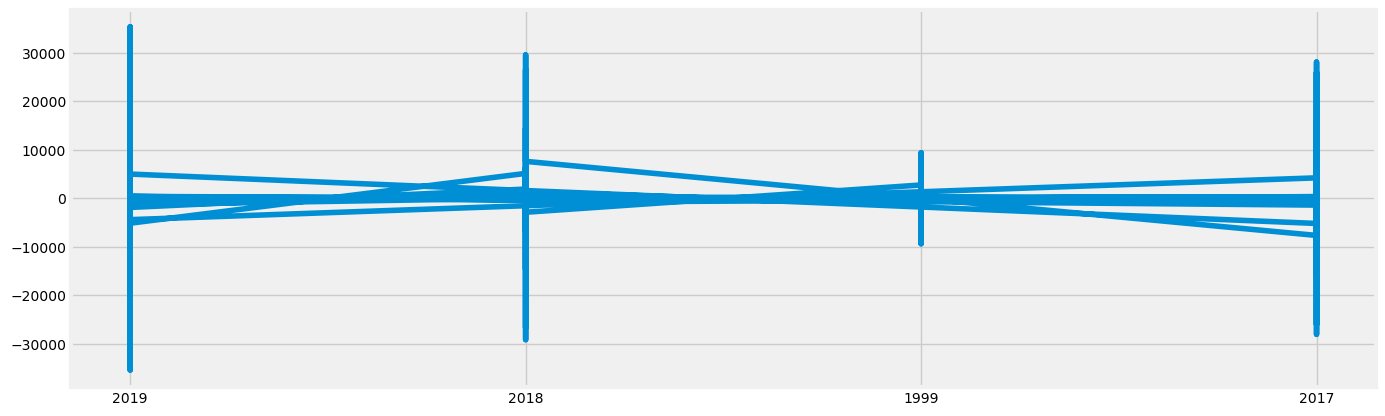

In [42]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [44]:
#recheck for stationarity
def dickey_fuller(timeseries):
    
 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test
dickey_fuller(data_diff['Total patent numbers'])

Dickey-Fuller Stationarity test:
Test Statistic                   -37.161060
p-value                            0.000000
Number of Lags Used               53.000000
Number of Observations Used    38383.000000
Critical Value (1%)               -3.430520
Critical Value (5%)               -2.861615
Critical Value (10%)              -2.566810
dtype: float64


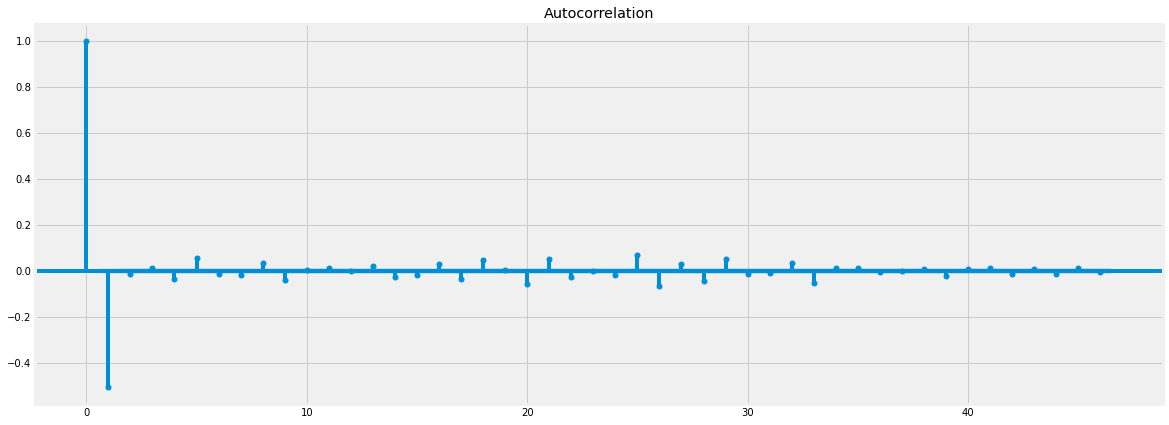

In [45]:
#check for autocorrelations with plot
plot_acf(data_diff)
plt.show()

The results of the Dickey-Fuller Test mean we can now reconsider our data stationary, however for a more satisfying result, a dataset with more years is necessary. 